# Problem Set 1
## *James Katz*

---

### Selection Bias in Counting Stars

___

Astronomers often use a magnitude-limited sample of objects, looking only at those objects brighter than a certain apparent magnitude. (Every telescope has a limit to how faint a source it can detect.) At larger distances, only the intrinsically brightest objects will be included in the sample, which (if not properly corrected for) will skew the statistics. This effect is called Malmquist bias, as it was first described in 1922 by Swedish astronomer Gunnar Malmquist. 

In statistics, this bias is referred to as a selection bias or data censoring. It affects the results in
a brightness-limited survey, where stars below a certain apparent brightness cannot be
included. Since observed stars and galaxies appear dimmer when farther away, the brightness
that is measured will fall off with distance until their brightness falls below the observational
threshold. Objects which are more luminous, or intrinsically brighter, can be observed at a
greater distance, creating a false trend of increasing intrinsic brightness, and other related
quantities, with distance. This effect has led to many spurious claims in the field of astronomy.

Here you will explore Malmquist bias by making a numerical model describing both the
distribution of stars and the way we observe them. If we observe stars down to a fixed
apparent brightness, we do not get a fair mixture of all the stars in the sky, be we include more
of the most luminous stars. This method of “Monte Carlo simulation” is frequently used when a
mathematical analysis would be too complex.

Consider a survey of nearby sun-like G-type stars. Your model sky consists of only G-type
stars in three regions at different distances: A (70 pc < d < 90 pc), B (90 pc < d < 110 pc), and
C (110 pc < d < 130 pc). The following questions are meant to guide you step-by-step through
the process of generating and interpreting your own “Monte Carlos” simulation of stars.

1. There are ~10,000 G-type stars at a distance between 90 and 110 parsecs from the Sun
(region B). Assume that the density of G stars is uniform such that they are randomly
spread across space. How many G stars do you expect to find in regions A and C? If you
were to randomly pick a star from regions A, B, and C, what is the probability that you
would pick a star from each region?

In [65]:
#!pip install matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt

In [66]:
VA = (4/3)*np.pi*(90)**3 - (4/3)*np.pi*(70)**3
VB = (4/3)*np.pi*(110)**3 - (4/3)*np.pi*(90)**3
VC = (4/3)*np.pi*(130)**3 - (4/3)*np.pi*(110)**3

Sum = VA + VB + VC                 # total volume in all three regions

frac_VA = VA/Sum                   # fraction of volume in region A
frac_VB = VB/Sum                   # fraction of volume in region B
frac_VC = VC/Sum                   # fraction of volume in region C

N_VB = 10000                       # instantiates the number of stars in region B as 10,000

N = N_VB/frac_VB                   # counts total number of stars in all three regions

N_VA = frac_VA * N                 # calculates number of stars in region A
N_VC = frac_VC * N                 # calculates number of stars in region B

prob_VA = N_VA/N                   # caluclates probability of choosing a star in region A
prob_VB = N_VB/N                   # caluclates probability of choosing a star in region B
prob_VC = N_VC/N                   # caluclates probability of choosing a star in region C

print("The volumes of regions A, B and C are ", VA,VB,VC, "respectively.")
print("The proportions of the whole sphere regions A, B, and C encompass are ", frac_VA,frac_VB,frac_VC, "respectively.")
print("The number of stars in regions A, B and C are ", N_VA,N_VB,N_VC, " respectively.")
print("The probability of randomly picking a star from regions A, B and C are ", prob_VA,prob_VB,prob_VC, "repsectively.")

The volumes of regions A, B and C are  1616873.0190475464 2521651.7032814072 3627492.317345015 respectively.
The proportions of the whole sphere regions A, B, and C encompass are  0.20819848975188776 0.32470334412081986 0.4670981661272924 respectively.
The number of stars in regions A, B and C are  6411.960132890364 10000 14385.382059800666  respectively.
The probability of randomly picking a star from regions A, B and C are  0.20819848975188776 0.32470334412081986 0.4670981661272924 repsectively.


#### Answer

$$V_A = \frac{4}{3} \pi (90)^3 - \frac{4}{3} \pi (70)^3 = 1616873.02 pc^3$$
$$V_B = \frac{4}{3} \pi (110)^3 - \frac{4}{3} \pi (90)^3 = 2521651.70 pc^3$$
$$V_C = \frac{4}{3} \pi (110)^3 - \frac{4}{3} \pi (130)^3 = 3627492.32 pc^3$$

Given 10,000 stars in region B, there will be 6411.96 stars in region A and 14,385.38 stars in region C.

The probability of randomly picking a star from regions A, B and C are 20.82%, 32.47% and 46.71%, repsectively.

____________________________________

2. G stars do not all have exactly the same luminosity; if the variation corresponds to about 0.3 magnitudes, what fractional change in luminosity is this? Remember the Sun is a G star.

#### Answer

Assuming absolute magnitude, $0.3 = \Delta M = M_2 - M_1 = -2.5log(L_2-L_1)$, there is a fractional change in luminosity of $\Delta L = 0.759.$  Otherwise put, the luminosity of G-type stars changes by about 75.9% on average.

_________________

3. Simulate the distribution of stars in regions A, B and C using a die, or a random number generator between 1 and 6 (e.g. with python or a spreadsheet). For each of your stars, roll the die and note the number $N_1$ on the upturned face, and give your star an absolute magnitude of $M_V = M_{V,\odot}+0.3(N_1-3.5)$. Try this at least 25 times and make a histogram of $M_V$ for your simulation. What kind of distribution does this produce? What is the purpose of subtracting by 3.5? How does the factor of 0.2 affect the distribution?

#### Answer

In [83]:
'''
We define two functions: abs_magnitude which calculates the absolute magnitude, and monte_carlo which rolls a random number
between 1 and 6.  The two functions work in tandem to create a output array of the absoluste magnitude calculated
by the random number.
'''

MVSun = 4.83                           # The absolute magnitude of the sun

def abs_magnitude(N1,const,deviation): # Takes in paramenters of the random number, constant in equation MV and deviation
                                       # from MV.  See formula in question 3.
    MV = MVSun + const*(N1-deviation)  # Calculates the absolute magnitude using N1, const and deviation.
    
    return MV

def monte_carlo(n,low,high,const,deviation,color,bool):    # Takes in the number of rolls, n, the lowest possible value, low,
    arr = []                                    # the highes possible value, high, and the const and deviation 
    for i in range(n):                          # for the formula.
        N1 = random.randint(low,high)           # Rolls a random number from low to high
        MV = abs_magnitude(N1,const,deviation)  # Calculates the absolute magnitude by calling the abs_value function
                                                # using the random number determined from each iteration.
        arr.append(MV)                          # Appends this absolute magnitude to the array.
    mean = np.mean(arr)                         # Calculates the mean of the constructed array.
    print('The mean of this array of absolute magnitudes for stars we placed in the sky is ', mean,'.')
    if bool == True:                            # Some questions ask for histograms, others just need the arrays
        draw_hist(arr,color)                    # which is why I separated the possible outputs into a list.
    else:
        mean_arr = np.mean(arr)
        return arr,mean_arr                     # It is convinient to either receive the array or the mean of the array
                                                # which is why I return a list containing both.
def draw_hist(arr,color):                       # If draw_hist is called, this function returns the labelled histogram.
    plt.hist(arr,color=color)                               
    plt.title(f'Histogram of Absolute Magnitude, rolls = %d' % len(arr))
    plt.xlabel('Absolute Magnitude')
    plt.ylabel('Frequency')
    return plt.show()

def apparent_mag(M,d):                          # This function calculates the apparent magnitude from the distance modulus
    m = M+5*np.log10(d/10)
    return m                                    # and returns the apparent magnitude.

def M_arr(n,low,high,const,deviation,color,bool,d):                    # This function does a monte carlo simulation,
    m_arr = []                                                         # then converts absolute to apparent magnitude based
    M_arr = monte_carlo(n,low,high,const,deviation,color,bool)[0]      # on distance using distance modulus function.
    for M in M_arr:                                                    # The function then checks whether the apparent
        mag = apparent_mag(M,d)                                        # magnitude is detectable with a telescope
        if mag <= 10:                                                  # which can only see up to 10 magnitudes.
            m_arr.append(mag)                                          # It then constructs an array containing only those
        else: continue                                                 # apparent magnitudes it detects.
    return m_arr,M_arr                                                 # The function returns both the detectable apparent 
                                                                       # magnitudes and the original absolute magnitudes which
                                                                       # were calculated in the monte carlo simulation.
        
def m_to_M(mags,d):                                                    # Finally, this function uses the array of detectable
    Mag_arr = []                                                       # apparent magnitudes and then converts them all to
    for mag in mags:                                                   # absolute magnitudes.
        M = mag - 5*np.log10(d/10)
        Mag_arr.append(M)
    print('The mean of this array of absolute magnitudes for stars we can detect with our telescope is ', np.mean(Mag_arr),'.')
    return Mag_arr

'''
These functions will be called in future problems in this problem set.  Every time monte_carlo with the argument 'True',
a histogram will automatically be drawn using draw_hist.  Otherwise, only the array of absolute magnitudes is returned.
'''

"\nThese functions will be called in future problems in this problem set.  Every time monte_carlo with the argument 'True',\na histogram will automatically be drawn using draw_hist.  Otherwise, only the array of absolute magnitudes is returned.\n"

The mean of this array of absolute magnitudes for stars we placed in the sky is  4.776 .


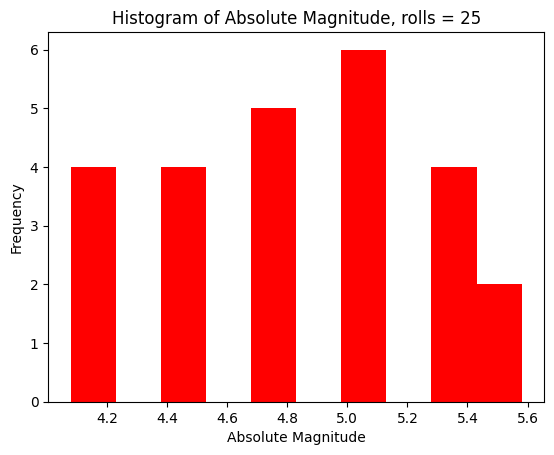

In [84]:
monte_carlo(25,1,6,0.3,3.5,'r',True) # Args: number of rolls, min dice value, max dice value, const, deviation, color for
                                     # histogram, boolean for whether to return the histogram.

From the histogram above, an even distribution can be inferred.  Below, I will call the monte carlo simulation with 10,000 rolls to even it out further.  It is not part of the question, but I think it proves an even distribution.

The mean of this array of absolute magnitudes for stars we placed in the sky is  4.834440000000001 .


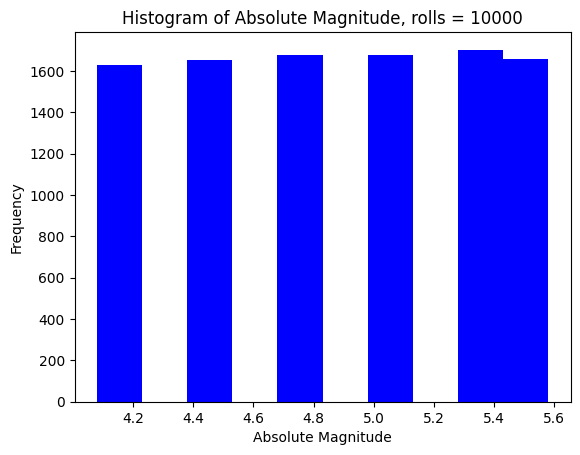

In [85]:
monte_carlo(10000,1,6,0.3,3.5,'b',True) # Args: number of rolls, min dice value, max dice value, const, deviation, color for
                                        # histogram, boolean for whether to return the histogram.

The parameters of const and deviation play a role in the distribution.  Deviation will be subtracted from N1 and then that expression will be multplied by const.  When deviation (for this problem) is 3.5, a random number from 1-6 will subtract the 3.5.  As a result, it can either be negative or positive.  However, once the const (0.3) is multiplied into this negative or positive answer, the final answer must be positive once added into the Abs Mag of the Sun, which is always bigger (at 4.3).
______________________________

4. Suppose you instead roll two dice (or roll the die twice) and record the sum as N1 for each star. This time give each star an absolute magnitude of $M_V = M_{V,\odot}+0.2(N_1-7)$. Make another histogram of $M_V$ for this simulation. How does this change your distribution? Does it change the mean of $M_V$? Which simulation do you think provides a more realistic distribution? Justify your choice.

#### Answer

The mean of this array of absolute magnitudes for stars we placed in the sky is  4.122 .


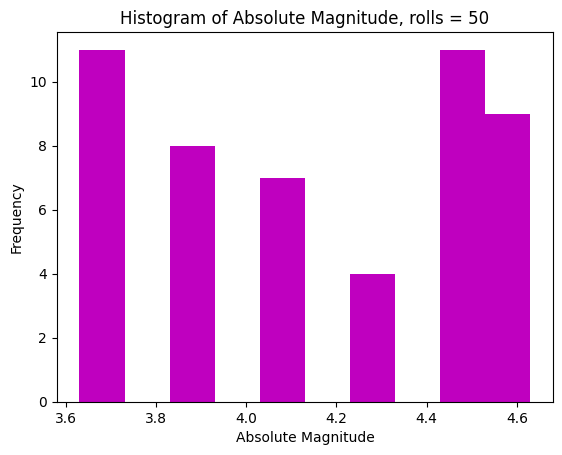

In [70]:
monte_carlo(50,1,6,0.2,7,'m',True) # Args: number of rolls, min dice value, max dice value, const, deviation, color for
                                   # histogram, boolean for whether to return the histogram.

It looks like the magnitude mean for both this problem and problem 3 are the same, around 4.81.  The number of rolls just gives a more precise distribution as you add more rolls, so that doesn't factor into the distribution by much.  The main difference here is the const and deviation used.  When a random number of 1-6 subtracts 7, the answer is always negative.  Once multiplied by 0.2, it contracts the answer.  The final magnitude will then always be larger than that of the sun.

5. Create a simulation with at least 25 stars in region B and a proportional number in regions A and C. You can use the distribution in either question 3 or 4. For simplicity, let all stars in region A be at a distance of 80 pc, etc. For each star, keep track of the region it is located in and the absolute magnitude $M_V$. Make sure that there is a variation of about 0.3 magnitudes in $M_V$, and show that this is the case by generating a histogram of $M_V$ for your entire sample.

#### Answer

Region A
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.92375 .


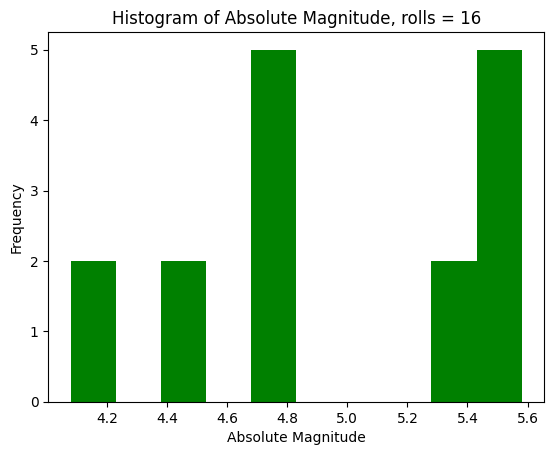

Region B
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.644 .


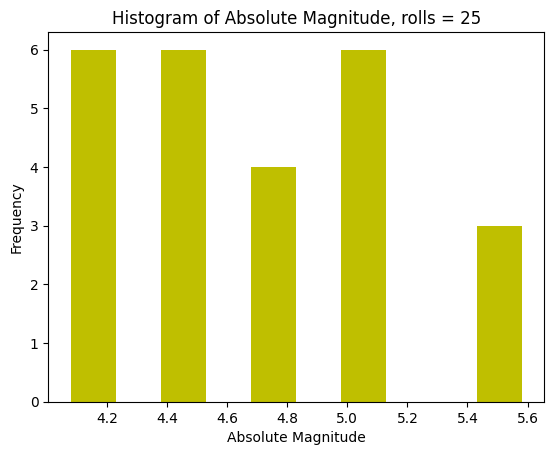

Region C
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.788333333333334 .


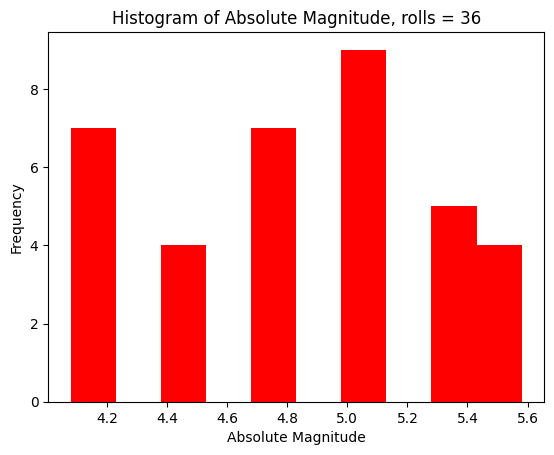

In [71]:
n_VB = 25                       # 25 stars in region B is given in the problem
n_total = n_VB/frac_VB          # we then use the volume to calculate total number of stars in all regions.
n_VA = round(n_total * prob_VA) # Number of stars in region A
n_VB = round(n_total * prob_VB) # Number of stars in region B
n_VC = round(n_total * prob_VC) # Number of stars in region C

print('Region A')
monte_carlo(n_VA,1,6,0.3,3.5,'g',True) # We use number of stars for each region as the argument for each monte carlo
print('Region B')
monte_carlo(n_VB,1,6,0.3,3.5,'y',True)
print('Region C')
monte_carlo(n_VC,1,6,0.3,3.5,'r',True)

6. Calculate the apparent magnitude, $m_V$, of each star using its distance and absolute magnitude. To “observe" your sky, use a “telescope” that can “see” only brighter than apparent magnitude $m_V = 10$. As your sample, select only those stars that meet this criterion from your dataset. How different is their mean absolute magnitude from that for all the stars that you placed in your sky?

#### Answer

In [72]:
mags = M_arr(16,1,6,0.3,3.5,'r',False,90) # caluclates apparent magnitude and throws out undetectables
Mags = m_to_M(mags[0],90)                 # converts all detectables to absolute magnitudes
Mag_arr = mags[0]                         # 0th index of output is the array of apparent magnitudes
mean_Mag = np.mean(mags[1])               # 1st index of output is the absolute magnitude
mean_diff = mean_Mag - np.mean(Mags)

print("The difference between the mean absolute magnitudes of the stars we placed in the sky, and the mean absolute magnitude of the stars our telescope can pick up is ",mean_diff," for this particular roll with a distance of 90 parsecs.")

mags = M_arr(25,1,6,0.3,3.5,'r',False,110)
Mags = m_to_M(mags[0],110)
Mag_arr = mags[0]
mean_Mag = np.mean(mags[1])
mean_diff = mean_Mag - np.mean(Mags)

print("The difference between the mean absolute magnitudes of the stars we placed in the sky, and the mean absolute magnitude of the stars our telescope can pick up is ",mean_diff," for this particular roll with a distance of 110 parsecs.")

mags = M_arr(36,1,6,0.3,3.5,'r',False,130)
Mags = m_to_M(mags[0],130)
Mag_arr = mags[0]
mean_Mag = np.mean(mags[1])
mean_diff = mean_Mag - np.mean(Mags)

print("The difference between the mean absolute magnitudes of the stars we placed in the sky, and the mean absolute magnitude of the stars our telescope can pick up is ",mean_diff," for this particular roll with a distance of 130 parsecs.")


The mean of this array of absolute magnitudes for stars we placed in the sky is  4.755 .
The mean of this array of absolute magnitudes for stars we can detect with our telescope is  4.434545454545455 .
The difference between the mean absolute magnitudes of the stars we placed in the sky, and the mean absolute magnitude of the stars our telescope can pick up is  0.3204545454545453  for this particular roll with a distance of 90 parsecs.
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.98 .
The mean of this array of absolute magnitudes for stars we can detect with our telescope is  4.38 .
The difference between the mean absolute magnitudes of the stars we placed in the sky, and the mean absolute magnitude of the stars our telescope can pick up is  0.6000000000000005  for this particular roll with a distance of 110 parsecs.
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.921666666666666 .
The mean of this array of absolu

7. What is the average distance to all the stars in your sample? Suppose you assumed that your sample stars each had the average luminosity for all this stars in your sky, and then calculate their distances from their apparent magnitudes: what would you find for their average distance? In which sense would you make an error?

#### Answer

In [73]:
av_dist = (16*90+25*110+36*130)/(16+25+36)                # Average distance to stars equally distributed in all regions A,B,C
print('The average distance to each star is ', av_dist)

m = MVSun+5*np.log10(av_dist/10)

print('If we assumed all the stars at the average distance of our distribution had luminosities equal to the earths, we wouldnt see any of them because the apparent magnitudes would be ',m,'which is undetectable using our telescopes. This would give us an error.')



The average distance to each star is  115.1948051948052
If we assumed all the stars at the average distance of our distribution had luminosities equal to the earths, we wouldnt see any of them because the apparent magnitudes would be  10.137164473296224 which is undetectable using our telescopes. This would give us an error.


8. Metal-poor main-sequence stars are bluer for a given luminosity, so they must be fainter at a particular spectral type; if the star’s fraction by weight of heavy elements is Z, then $\Delta M_V \approx -0.87 log_{10} (Z/Z_{\odot})$. For each of your stars, roll the die again, note the number $N_2$ set $Z/Z_{\odot} = (N_2+0.5)/6$ and change its absolute magnitude from part (1) by $\Delta M_V$. Calculate the average metallicity for region A. Do you think the observable stars in regions B and C would be more or less metal rich than what is actually in your model sky? Make a prediction for what you will find.

#### Answer

In [74]:
N2 = 25
ZSun = 0.012

delta_M = monte_carlo(N2,1,6,(1/6),0.5,'r',False)[1] - MVSun
print('The average absolute magnitude of these low metalicity stars is about ', delta_M, 'less than the suns absolute magnitude.')

Z = ZSun*10**(delta_M/-0.87)

print('These metal poor main sequence G-type spectral stars have an average metalicity of ', Z,'.')
print('The average metalicity for low metalicity G-type stars should be evenly distributed accross all regions of space.')
print('The observable stars in regions B and C would have a higher average metalicity.  This is because the low metalalicity stars of similar spectral type will be fainter.')

The mean of this array of absolute magnitudes for stars we placed in the sky is  5.233333333333333 .
The average absolute magnitude of these low metalicity stars is about  0.4033333333333333 less than the suns absolute magnitude.
These metal poor main sequence G-type spectral stars have an average metalicity of  0.0041264797049297254 .
The average metalicity for low metalicity G-type stars should be evenly distributed accross all regions of space.
The observable stars in regions B and C would have a higher average metalicity.  This is because the low metalalicity stars of similar spectral type will be fainter.


9. Now observe your stellar sample again with the same telescope. For your sample of stars, calculate the average Z of those that fall in regions B and C. Are these more or less metalrich than all the stars that you placed in your sky.

#### Answer

In [82]:
N = 10000
N_A = round(prob_VA * N)
N_B = round(prob_VB * N)
N_C = round(prob_VC * N)

mags110 = M_arr(N_B,1,6,0.3,3.5,'r',False,110)
mags130 = M_arr(N_C,1,6,0.3,3.5,'r',False,130)

print('For region B,')
visible_mean_Mags110 = m_to_M(mags110[0],110)[0]
print('For region C,')
visible_mean_Mags130 = m_to_M(mags130[0],130)[0]

delta_M110 = MVSun - visible_mean_Mags110
delta_M130 = MVSun - visible_mean_Mags130

Z110 = ZSun*10**(visible_mean_Mags110/-0.87)
Z130 = ZSun*10**(visible_mean_Mags110/-0.87)

print('The average metalicity for G-type spectral stars in region B is ', delta_M110,'.')
print('The average metalicity for G-type spectral stars in region C is ', delta_M130,'.')

The mean of this array of absolute magnitudes for stars we placed in the sky is  4.826997228210656 .
The mean of this array of absolute magnitudes for stars we placed in the sky is  4.829454078355813 .
For region B,
The mean of this array of absolute magnitudes for stars we can detect with our telescope is  4.377424892703862 .
For region C,
The mean of this array of absolute magnitudes for stars we can detect with our telescope is  4.223729903536977 .
The average metalicity for G-type spectral stars in region B is  0.7500000000000009 .
The average metalicity for G-type spectral stars in region C is  0.7500000000000009 .


10. Pause to think about how Malmquist bias may appear in other contexts in astronomy. List at least three examples in which measurements may be biased in this way.

#### Answer

If we make errors in magnitude measurements, we will overestimate the number of galaxies of a particular magnitude.  We may also make errors with estimating the number of stars in our own galaxy.  We may also overestimate the amount of dark matter that exists in our galaxy.

11. Suppose you observe Type Ia supernovae to an apparent magnitude limit $m_{limit}$. We have good reason to believe that these supernovae form a population with luminosities in a narrow range, i.e., they are standard candles. They are also expected to be uniformly distributed in space. But if we use redshift to determine the distances to these supernovae, do the more distant supernovae appear to be more or less luminous than the nearby ones?

#### Answer

Using distance modulus, this narrow range of luminosities (therefore narrow range of absolute magnitudes) will give us far distances very reliably.  However, because of the expansion of space and enormous velocity vectors of these distant galaxies, redshift measurements will give us a wider range of luminosities.